In [0]:
%config IPCompleter.greedy=True

In [0]:
import os
import xml.etree.ElementTree as ET
import re
import string
import matplotlib.pyplot as plt
import torch

In [0]:
def rule(line):
    if len(line) == 0: # remove empty line
        return False
    if line[0] == '*': # this char seems to indicate a comment
        return False
    return True

In [0]:
def clean_word(word):
    s = "#/-_ \n"
    w= word.rstrip(s)
    return w.lstrip(s)

In [4]:
clean_word('\n     /re-eff #')

're-eff'

In [5]:
text = '\n\n\n Recorddate:2070-02-24\n'

re.sub(r'[\n]','',text)
text.strip('\n ')


'Recorddate:2070-02-24'

In [0]:
def extract_words(text, tags):
    tag ='O'
    body = {
        'start': 0,
        'end' : 0
    }
    if tags:
        tag, body = tags.pop(0)
    words = []
    word = ''
    for index, char in enumerate(text):
        
        if char == ' ' or char == '\n':
            if word:
                if index > int(body['start']) and index <= (int(body['end']) + 1):
                    words.append((body['TYPE'], clean_word(word)))
                else:
                    words.append(('O', clean_word(word)))
            word = ''
        else:
            word += char
        
        if index > int(body['end']) and tags:
            tag, body = tags.pop(0)
    
    return words
            
        
    

In [7]:
path = './Data'

if not os.path.isdir(path): 
    raise   Exception('Enter valid directory path')

for file in os.listdir(path)[:2]:
    print(file)
    tree = ET.parse(os.path.join(path, file))
    root = tree.getroot()
    print(root.tag)
    
    for child in root:
        print(child.tag)
        if child.tag == 'TEXT':
            text = child.text
            print(len(text))
            print(text[4680:4685])
            l = text.splitlines()
        
        if child.tag == 'TAGS':
            tags = []
            for tag in child:
                tags.append((tag.tag, tag.attrib))
    w = extract_words(text, tags)
    break
    

    


282-01.xml
deIdi2b2
TEXT
4750
62884
TAGS


In [8]:
print(w[:10])

[('O', 'Record'), ('O', 'date:'), ('DATE', '2070-02-24'), ('DATE', 'February'), ('DATE', '24,'), ('DATE', '2070'), ('DOCTOR', 'Leon'), ('DOCTOR', 'F.'), ('DOCTOR', 'Craft,'), ('O', 'M.D.')]


In [9]:
list(filter(lambda i : i[0] != 'O', w))[:300]

[('DATE', '2070-02-24'),
 ('DATE', 'February'),
 ('DATE', '24,'),
 ('DATE', '2070'),
 ('DOCTOR', 'Leon'),
 ('DOCTOR', 'F.'),
 ('DOCTOR', 'Craft,'),
 ('HOSPITAL', 'North'),
 ('HOSPITAL', 'Penn'),
 ('HOSPITAL', 'Hospital'),
 ('STREET', '169'),
 ('STREET', 'Tamworth'),
 ('STREET', 'Place'),
 ('CITY', 'Garnett,'),
 ('STATE', 'CA'),
 ('ZIP', '47749'),
 ('PATIENT', 'Peter'),
 ('PATIENT', 'Joshi'),
 ('MEDICALRECORD', '453-39-84-4'),
 ('DOCTOR', 'Craft:'),
 ('PATIENT', 'Peter'),
 ('PATIENT', 'Joshi'),
 ('DATE', 'February'),
 ('DATE', '24th.'),
 ('PATIENT', 'Joshi'),
 ('PATIENT', 'Joshi'),
 ('PATIENT', 'Peter'),
 ('PATIENT', 'Joshi'),
 ('MEDICALRECORD', '453-39-84-4'),
 ('DATE', '02/24/70'),
 ('DATE', 'December'),
 ('DATE', 'December.'),
 ('PATIENT', 'Joshi'),
 ('PATIENT', 'Joshi'),
 ('PATIENT', 'Joshi'),
 ('PATIENT', 'Peter'),
 ('PATIENT', 'Joshi'),
 ('MEDICALRECORD', '453-39-84-4'),
 ('DATE', '02/24/70'),
 ('DOCTOR', 'John'),
 ('DOCTOR', 'Riggs,'),
 ('DOCTOR', 'quandt'),
 ('DOCTOR', 'Corrine'

### embed the vector and the test

#### target


In [0]:
targets = {
    'DOCTOR': 0,
    'HOSPITAL': 1,
    'MEDICALRECORD': 2,
    'STREET': 3,
    'CITY': 4,
    'STATE': 5,
    'ZIP': 6,
    'DATE': 7,
    'PATIENT': 8,
    'O':9
}
def compute_target(words):
    t = [targets[i[0]] for i in words]
    return torch.tensor(t)
    #return torch.eye(len(targets))[t,:]
    

In [51]:
compute_target(w)

tensor([9, 9, 7, 7, 7, 7, 0, 0, 0, 9, 1, 1, 1, 3, 3, 3, 4, 5, 6, 9, 8, 8, 9, 2,
        9, 9, 0, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 7, 7, 9, 8, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        8, 8, 9, 2, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [12]:
! pip install flair

     |████████████████████████████████| 143kB 4.9MB/s 
     |████████████████████████████████| 481kB 10.5MB/s 
     |████████████████████████████████| 798kB 22.5MB/s 
     |████████████████████████████████| 1.0MB 29.4MB/s 
     |████████████████████████████████| 235kB 45.7MB/s 
     |████████████████████████████████| 1.0MB 49.0MB/s 
     |████████████████████████████████| 3.1MB 28.2MB/s 
     |████████████████████████████████| 870kB 70.6MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.6.0-cp36-none-any.whl size=14689 sha256=8f45bce967f8d4be7d9a4f03f9a5af90b1a5f95963e370b8000d13cc77b12ec5
  Stored in directory: /root/.cache/pip/wheels/bd/57/d3/907c3ee02d35e66f674ad0106e61f06eeeb98f6ee66a6cc3fe
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=845306e239b71d17115f39c9aa5378e9ff4bc30d57a5fdb96c49baf49a8c15f4
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for langdetect: 

In [13]:
torch.cuda.current_device()

0

In [14]:
device = torch.device('cuda')
torch.cuda.current_device()

0

In [128]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence

# init standard GloVe embedding
glove_embedding = WordEmbeddings('glove')

# init Flair forward and backwards embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        glove_embedding,
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

2020-02-05 16:01:19,002 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpnwl4lerj


100%|██████████| 160000128/160000128 [00:10<00:00, 14863070.99B/s]

2020-02-05 16:01:30,501 copying /tmp/tmpnwl4lerj to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-02-05 16:01:30,727 removing temp file /tmp/tmpnwl4lerj
2020-02-05 16:01:31,361 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmp59inh2q5


100%|██████████| 21494764/21494764 [00:05<00:00, 4115466.72B/s]

2020-02-05 16:01:37,260 copying /tmp/tmp59inh2q5 to cache at /root/.flair/embeddings/glove.gensim
2020-02-05 16:01:37,281 removing temp file /tmp/tmp59inh2q5



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2020-02-05 16:01:39,478 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpgw11eonn


100%|██████████| 73034624/73034624 [00:05<00:00, 12381958.90B/s]

2020-02-05 16:01:46,085 copying /tmp/tmpgw11eonn to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2020-02-05 16:01:46,184 removing temp file /tmp/tmpgw11eonn
2020-02-05 16:01:48,882 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpzsu2nvul


100%|██████████| 73034575/73034575 [00:05<00:00, 12581311.14B/s]

2020-02-05 16:01:55,416 copying /tmp/tmpzsu2nvul to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2020-02-05 16:01:55,482 removing temp file /tmp/tmpzsu2nvul


In [129]:
stacked_embeddings.embedding_length

4196

In [0]:
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
from time import time

In [0]:
def compute_embedding(data, emb):
    '''
        Use a flair embedding to compute the embedding of a list of words
    '''
    tenso = torch.zeros(len(data), emb.embedding_length)
    progress = IntProgress(min=0, max=len(data)) # instantiate the bar
    label = HTML()
    box = VBox(children=[progress, label])
    display(box)
    t0 = time()
    for i in range(len(data)):
        m = max(0,  i -10)
        m2 = min (len(data), i + 11)
        s = Sentence(" ".join(data[m:m2]))
        emb.embed(s)
        tenso[i] = s.tokens[i -m].embedding
        progress.value +=1
        t = time()
        label.value = f'Processing word {i}/{len(data)}, time by word: {t -t0}s'
        t0 = t
    return tenso
        

In [132]:
t = compute_embedding([i[1] for i in w], stacked_embeddings)

In [0]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)


In [0]:
pca.fit(t)
pdata = pca.transform(t)

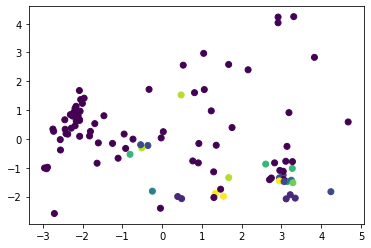

In [135]:
%matplotlib inline
def col(string):
  return 9 - targets[string]
fig, ax = plt.subplots()
z = pdata[:,0][:100]
y = pdata[:,1][:100]
ax.scatter(z, y, c=[col(i[0]) for i in w][:100])

# for i, txt in enumerate(w[:100]):
    # ax.annotate(txt[1] if txt[0] != 'O' else '', (z[i], y[i]))

In [0]:
import torch
import torch.nn as nn

In [0]:
class Model(nn.Module):

  def __init__(self):
    super(Model,self).__init__()

    self.l1 = nn.Linear(4196,100)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()
    self.l2 = nn.Linear(100,50)
    self.l3 = nn.Linear(50,10)
  
  def forward(self, inputs):
    o1 = self.relu(self.l1(inputs))
    o2 = self.relu(self.l2(o1))
    return self.softmax(self.l3(o2))

In [0]:
model = Model()

# Choose the hyperparameters for training: 
num_epochs = 100
batch_size = 10

# Use mean squared loss function 
criterion = nn.CrossEntropyLoss(torch.tensor([10.0]*9+[1.0]))

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [0]:
from torch.utils.data import DataLoader, random_split, TensorDataset




In [0]:
dataset = TensorDataset(t, compute_target(w))

In [0]:
def train(num_epochs, batch_size, criterion, optimizer, model, dataset):
  train_error = []
  train_loader = DataLoader(dataset, batch_size, shuffle=True)
  model.train()
  for epoch in range(num_epochs):
    epoch_average_loss = 0.0
    for (words, labels) in train_loader:
      y_pred = model(words)
      loss = criterion(y_pred, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      epoch_average_loss += loss.item() * batch_size / len(dataset)
    train_error.append(epoch_average_loss)
    print('Epoch [{}/{}], Loss: {:.4f}'
          .format(epoch+1, num_epochs, epoch_average_loss))
  return  train_error


In [217]:
train_error = train(num_epochs,batch_size, criterion, optimizer, model, dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoch [1/100], Loss: 2.2965
Epoch [2/100], Loss: 2.1460
Epoch [3/100], Loss: 1.8320
Epoch [4/100], Loss: 1.7495
Epoch [5/100], Loss: 1.7534
Epoch [6/100], Loss: 1.7032
Epoch [7/100], Loss: 1.6727
Epoch [8/100], Loss: 1.6668
Epoch [9/100], Loss: 1.6602
Epoch [10/100], Loss: 1.6532
Epoch [11/100], Loss: 1.6645
Epoch [12/100], Loss: 1.6272
Epoch [13/100], Loss: 1.6238
Epoch [14/100], Loss: 1.6249
Epoch [15/100], Loss: 1.6122
Epoch [16/100], Loss: 1.5987
Epoch [17/100], Loss: 1.5737
Epoch [18/100], Loss: 1.5816
Epoch [19/100], Loss: 1.5728
Epoch [20/100], Loss: 1.5685
Epoch [21/100], Loss: 1.5614
Epoch [22/100], Loss: 1.5584
Epoch [23/100], Loss: 1.5476
Epoch [24/100], Loss: 1.5301
Epoch [25/100], Loss: 1.5339
Epoch [26/100], Loss: 1.5344
Epoch [27/100], Loss: 1.5250
Epoch [28/100], Loss: 1.5210
Epoch [29/100], Loss: 1.5181
Epoch [30/100], Loss: 1.5143
Epoch [31/100], Loss: 1.5196
Epoch [32/100], Loss: 1.5088
Epoch [33/100], Loss: 1.5044
Epoch [34/100], Loss: 1.5011
Epoch [35/100], Loss: 1

Text(0.5, 1.0, 'Visualization of convergence')

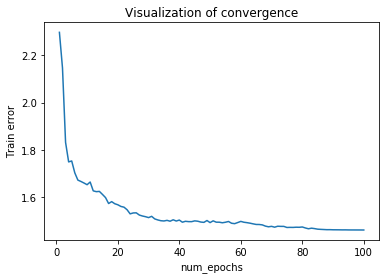

In [218]:
# plot the training error wrt. the number of epochs: 
plt.plot(range(1, num_epochs+1), train_error)
plt.xlabel("num_epochs")
plt.ylabel("Train error")
plt.title("Visualization of convergence")

In [0]:
# Calculate the accuracy to evaluate the model
def accuracy(dataset, model):

    with torch.no_grad():
        word_correct = 0
        dataloader = DataLoader(dataset)
        for words, labels in dataloader:
            #images = images.view(-1, 28*28)
            y_pred = model(words)
            _, word_predicted = torch.max(y_pred.data, 1) 
            word_correct += (word_predicted == labels).sum()
        print('Accuracy of the model for numbers : {:.2f} %'.format(100*word_correct.item()/ len(dataset)))

         

In [220]:
accuracy(dataset, model)

Accuracy of the model for numbers : 100.00 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [0]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm
from pylab import figure, cm

def conf_mat(dataset,model):
    words, labels = dataset.tensors
    y_pred = model(words)
    _, word_predicted = torch.max(y_pred.data, 1) 
    return confusion_matrix(word_predicted, labels)



In [0]:
from itertools import product

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


DOCTOR 0|HOSPITAL 1|MEDICALRECORD 2|STREET 3|CITY 4|STATE 5|ZIP 6|DATE 7|PATIENT 8|O 9|

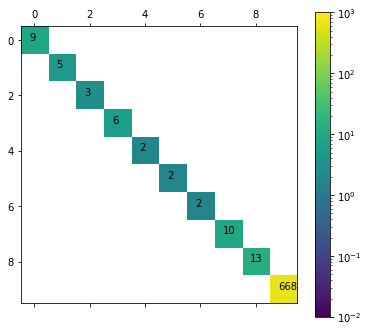

In [223]:
mat = conf_mat(dataset,model)
f = plt.figure(figsize=(6.2,5.6))
ax = f.add_subplot(111)
im = ax.matshow(mat, norm=LogNorm(vmin=0.01, vmax=1000))
f.colorbar(im)
for i,j in product(range(10), range(10)):
  ax.text(j-0.2,i, str(mat[i][j]) if mat[i,j]>0 else '')
f.show()
for ind, i in enumerate(targets):
  print(i,ind, end='|')

In [0]:
import pickle as pkl
with open('embedding.pkl', 'wb') as fp:
    pkl.dump(t, fp)

In [0]:
def sentence_maker(words, size, step):
    n = len(words)
    res = []
    ind = 0
    while ind + size <= n:
        res.append(" ".join(words[ind: ind + size]))
        ind = ind + step
    return res
    

In [0]:
s = sentence_maker([i[1] for i in w], 10, 5)
s[:10]

['Record date: 2070-02-24 February 24, 2070 Leon F. Craft, M.D.',
 '2070 Leon F. Craft, M.D. North Penn Hospital 169 Tamworth',
 'North Penn Hospital 169 Tamworth Place Garnett, CA 47749 RE:',
 'Place Garnett, CA 47749 RE: Peter Joshi MR 453-39-84-4 Dear',
 'Peter Joshi MR 453-39-84-4 Dear Dr. Craft: I had the',
 'Dr. Craft: I had the pleasure of meeting Peter Joshi',
 'pleasure of meeting Peter Joshi in the Cardiology Clinic on',
 'in the Cardiology Clinic on February 24th. Mr. Joshi presents',
 'February 24th. Mr. Joshi presents with a complaint of dyspnea',
 'with a complaint of dyspnea and oxygen requirement. The patient']

In [0]:
sent = Sentence(s[5])
flair_forward_embedding.embed(sent)
'''for t in sent:
    print(t, t.embedding)'''

'for t in sent:\n    print(t, t.embedding)'

In [0]:
from sklearn.decomposition import PCA
import numpy as np

In [0]:
sent.tokens[0].embedding.tolist()

2048

In [0]:
data = []
for ind, t in enumerate(sent.tokens):
    data.append(t.embedding.tolist())
data = np.array(data)

NameError: ignored

In [0]:
pca = PCA(n_components=2)
pca.fit(data)
pdata = pca.transform(data)

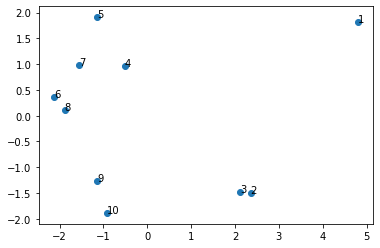

In [0]:
fig, ax = plt.subplots()
z = pdata[:,0]
y = pdata[:,1]
ax.scatter(z, y)

for i, txt in enumerate(range(1, len(z) +1)):
    ax.annotate(txt, (z[i], y[i]))

In [0]:
for t in sent:
    print(t)

Token: 1 Dr.
Token: 2 Craft:
Token: 3 I
Token: 4 had
Token: 5 the
Token: 6 pleasure
Token: 7 of
Token: 8 meeting
Token: 9 Peter
Token: 10 Joshi
